# Problem 2 Solution

Use this notebook to write your code for problem 2b. Some code snippets from the notebook used in Recitation 1 may be useful to you as examples for using numpy and scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as an numpy ndarray.
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

## Loading the Data
First we will load the data from bv_data.csv using the load_data helper function. Note that data[:, 0] is an array of all the x values in the data and data[:, 1] is an array of the corresponding y values.

In [3]:
data = load_data('data/bv_data.csv')
x = data[:, 0]
y = data[:, 1]

## Creating and Training the Model
We now write a general polynomial regressor class that uses np.polyfit and np.polyval to train and generate predictions. This class can be used to create linear, quadratic, and cubic regressors as required by the problem.

In [4]:
class polynomial_regressor():
    def __init__(self, degree):
        self.degree = degree
        self.coefficients = None

    def fit(self, X, y):
        self.coefficients = np.polyfit(X, y, self.degree)
    
    def predict(self, X):
        if self.coefficients.any():
            return np.polyval(self.coefficients, X)
        else:
            print("Use the fit function before predicting.")
    
    def score(self, y_true, prediction):
        return mean_squared_error(y_true, prediction)

## Generating the Learning Curves

The following two functions are used to generate the data required for a learning curve and to actually plot the curve itself. Note that learning_curve is a helper function used in plot_learning_curve.

In [5]:
def learning_curve(estimator, X, y, cv, train_sizes):
    train_error = []
    cv_error = []
    for num_points in train_sizes:
        subset_x = X[:num_points]
        subset_y = y[:num_points]
        
        cv_train_error = []
        cv_test_error = []
        for train, test in cv.split(subset_x):
            train_x, test_x, train_y, test_y = subset_x[train], subset_x[test], subset_y[train], subset_y[test]
            
            estimator.fit(train_x, train_y)
            cv_train_error.append(estimator.score(train_y, estimator.predict(train_x)))
            cv_test_error.append(estimator.score(test_y, estimator.predict(test_x)))
        
        train_error.append(cv_train_error)
        cv_error.append(cv_test_error)
    
    return train_sizes, train_error, cv_error

In [6]:
def plot_learning_curve(estimator, title, X, y, train_sizes, ylim=None, cv=None):
    """
    Plots the learning curve for the model. This function is taken predominantly from
    an sklearn example.
    """
    plt.figure(figsize=(12,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    train_sizes, train_scores, cv_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    cv_scores_mean = np.mean(cv_scores, axis=1)
    cv_scores_std = np.std(cv_scores, axis=1)
    
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Error")
    plt.plot(train_sizes, cv_scores_mean, 'o-', color="g", label="Cross-Validation Error")

    plt.legend(loc="best")
    return plt

## Main Code
Here is the code that actually uses the above functions and classes to generate the three learning curves.

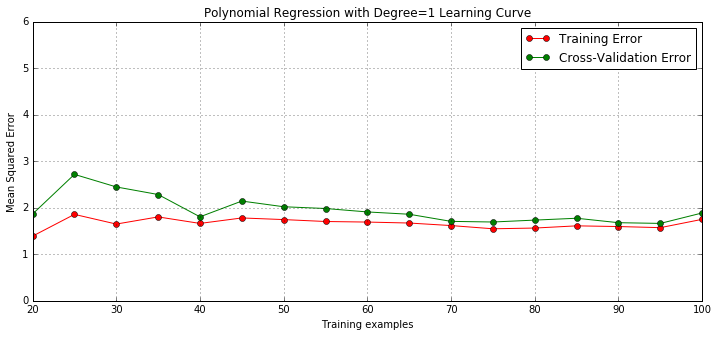

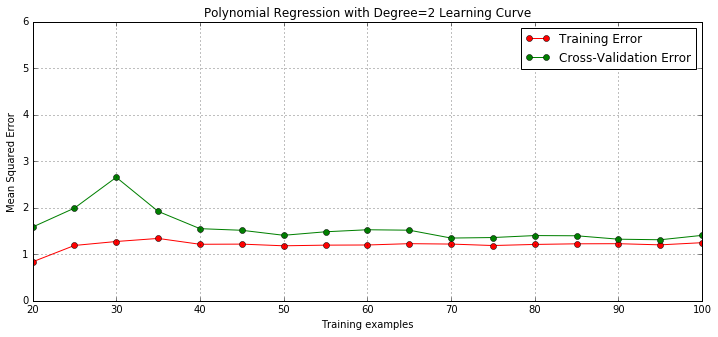

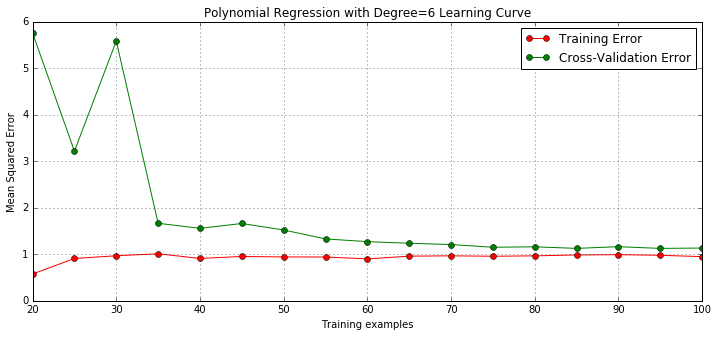

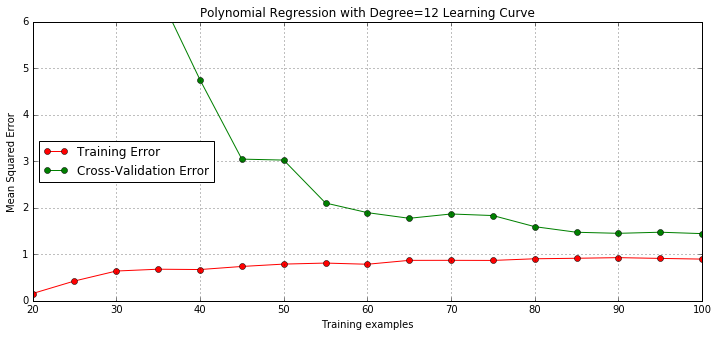

In [7]:
degrees = [1, 2, 6, 12]
cv = KFold(n_splits=5, shuffle=False, random_state=None)
training_sizes = range(20, 105, 5)

for degree in degrees:
    title = 'Polynomial Regression with Degree=%i Learning Curve' %degree
    poly_reg = polynomial_regressor(degree)
    plt = plot_learning_curve(poly_reg, title, x, y, ylim=(0.0, 6.0), cv=cv, train_sizes=training_sizes)
    plt.show()